In [1]:
pip install deepface

In [2]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [75]:
img1 = "src/pic0001.jpg"
img2 = "src/pic2024.jpg"

In [76]:
from deepface import DeepFace

objs1 = DeepFace.analyze(img1, actions = ['age', 'gender', 'race', 'emotion'])
objs2 = DeepFace.analyze(img2, actions = ['age', 'gender', 'race', 'emotion'])

age1 = objs[0]['age']
gender1 = objs[0]['dominant_gender']
race1 = objs[0]['dominant_race']
emotion1 = objs[0]['dominant_emotion']
age2 = objs[0]['age']
gender2 = objs[0]['dominant_gender']
race2 = objs[0]['dominant_race']
emotion2 = objs[0]['dominant_emotion']

print(img1)
print(f"推定年齢: {age1}歳")
print(f"性別: {gender1}")
print(f"人種: {race1}")
print(f"感情: {emotion1}")

print("--------------")

print(img2)
print(f"推定年齢: {age2}歳")
print(f"性別: {gender2}")
print(f"人種: {race2}")
print(f"感情: {emotion2}")

Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.60it/s]

src/pic0001.jpg
推定年齢: 28歳
性別: Man
人種: asian
感情: fear
--------------
src/pic2024.jpg
推定年齢: 28歳
性別: Man
人種: asian
感情: fear


In [77]:
result = DeepFace.verify(img1, img2)
print(result['distance']);
print("---------------------")
if result['verified']:
    print("同一人物です")
else:
    print("同一人物ではありません")

0.5377400148962973
---------------------
同一人物です


Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.12s/it]


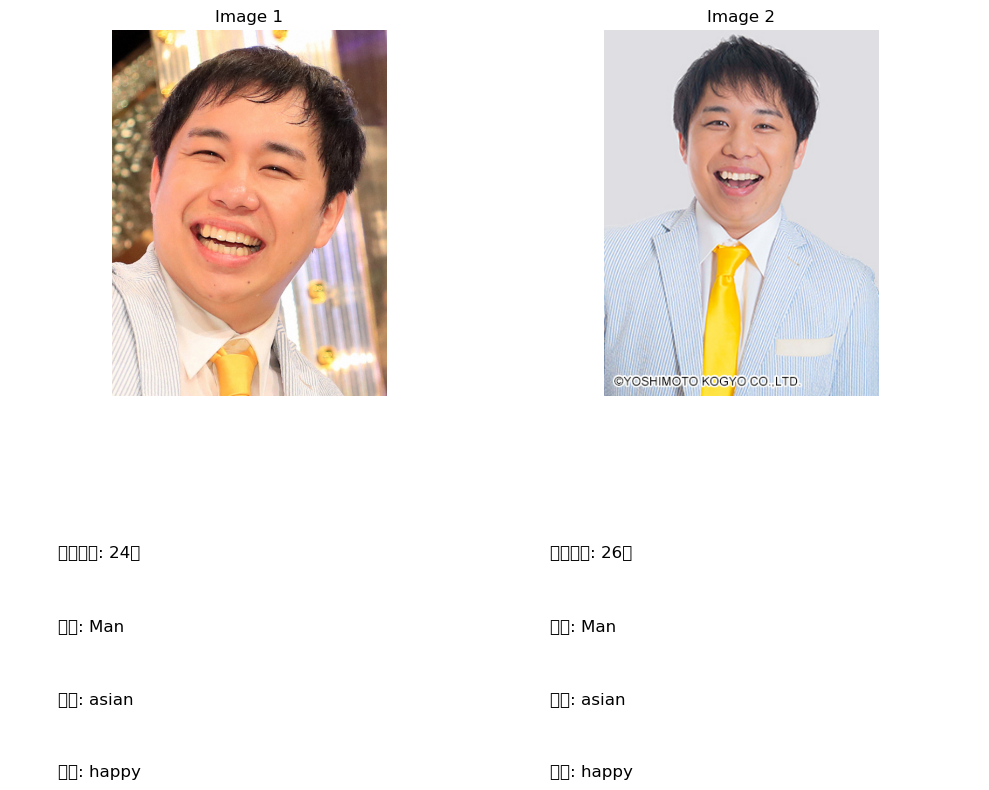

In [88]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# 画像のパスを指定
img1_path = "src/seiya01.jpg"
img2_path = "src/seiya02.jpg"

# DeepFaceを使って画像を比較
result1 = DeepFace.analyze(img_path=img1_path, actions=['age', 'gender', 'race', 'emotion'])
result2 = DeepFace.analyze(img_path=img2_path, actions=['age', 'gender', 'race', 'emotion'])

# 判定結果の取得
age1 = result1[0]['age']
gender1 = result1[0]['dominant_gender']
race1 = result1[0]['dominant_race']
emotion1 = result1[0]['dominant_emotion']

age2 = result2[0]['age']
gender2 = result2[0]['dominant_gender']
race2 = result2[0]['dominant_race']
emotion2 = result2[0]['dominant_emotion']

# 画像を読み込む
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# OpenCVはBGR形式で画像を読み込むため、RGB形式に変換
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.figure(figsize=(10, 8))

# 画像1の表示
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis('off')

# 画像1の属性情報を表示
plt.subplot(2, 2, 3)
plt.text(0.1, 0.6, f"推定年齢: {age1}歳", fontsize=12)
plt.text(0.1, 0.4, f"性別: {gender1}", fontsize=12)
plt.text(0.1, 0.2, f"人種: {race1}", fontsize=12)
plt.text(0.1, 0.0, f"感情: {emotion1}", fontsize=12)
plt.axis('off')

# 画像2の表示
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis('off')

# 画像2の属性情報を表示
plt.subplot(2, 2, 4)
plt.text(0.1, 0.6, f"推定年齢: {age2}歳", fontsize=12)
plt.text(0.1, 0.4, f"性別: {gender2}", fontsize=12)
plt.text(0.1, 0.2, f"人種: {race2}", fontsize=12)
plt.text(0.1, 0.0, f"感情: {emotion2}", fontsize=12)
plt.axis('off')

# 判定結果を表示
plt.tight_layout()
plt.show()
